In [1]:
from keras.datasets import mnist
from matplotlib import pyplot as plt
import numpy as np

In [2]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

Проверка размерностей. Вроде подходят.

In [3]:
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))
print(test_X[0])

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0
    0   0   0   0   0

In [4]:
test_X = test_X.astype('float32')/255
train_X = train_X.astype('float32')/255

Визуально отобразим.

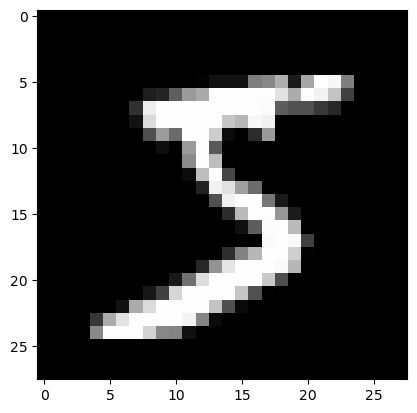

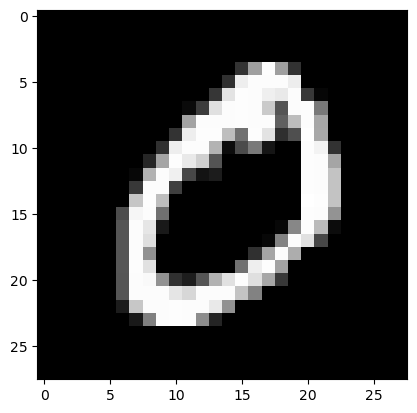

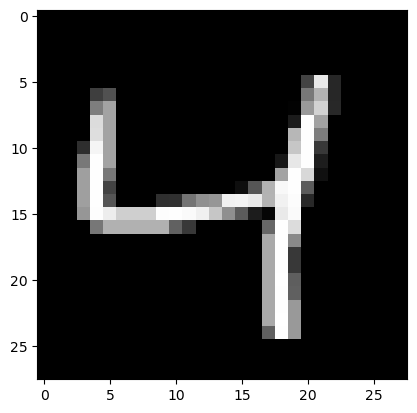

In [5]:
for i in range(3):  
    plt.imshow(train_X[i], cmap=plt.get_cmap('gray'))
    plt.show()

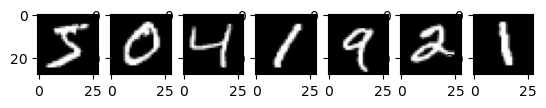

In [6]:
for i in range(7) :
    plt.subplot(1, 7, i+1)
    plt.imshow(train_X[i], cmap=plt.get_cmap('gray'))
plt.show()

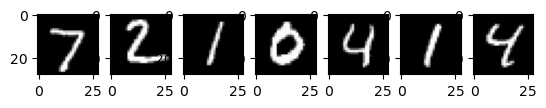

In [7]:
for i in range(7) :
    plt.subplot(1, 7, i+1)
    plt.imshow(test_X[i], cmap=plt.get_cmap('gray'))
plt.show()

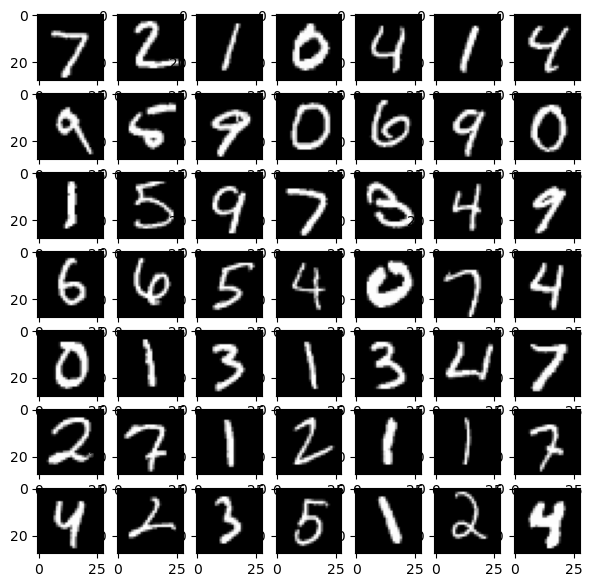

In [8]:
fig, axes = plt.subplots(7, 7, figsize = (7, 7))
for i, ax in enumerate(axes.flat):
        ax.imshow(test_X[i], cmap = 'gray')

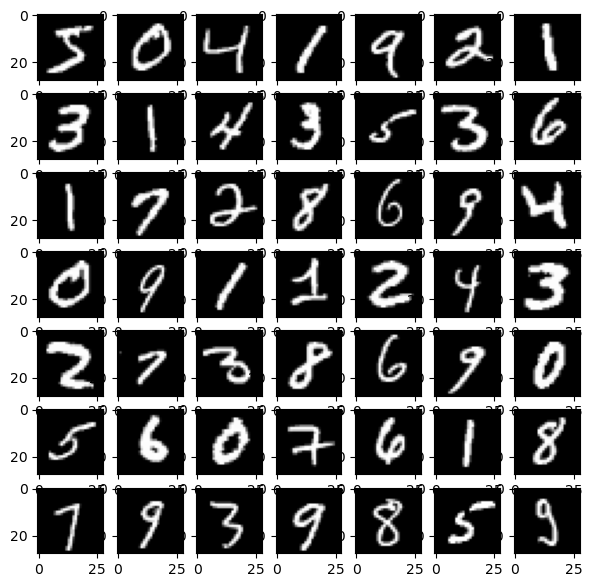

In [9]:
fig, axes = plt.subplots(7, 7, figsize = (7, 7))
for i, ax in enumerate(axes.flat):
        ax.imshow(train_X[i], cmap = 'gray')

Создаем нейросеть

In [10]:
class MyNeuralNetwork:
    def __init__(self, input_layer, hidden_layer, output_layer, learning_rate):
        self.input_layer = input_layer
        self.hidden_layer = hidden_layer
        self.output_layer = output_layer
        self.learning_rate = learning_rate
        
        self.input_weights =   np.random.normal(3, 2.5, size=(input_layer, hidden_layer)) * 0.001
#         np.random.randn(input_layer, hidden_layer) * 0.001
#         np.random.normal(3, 2.5, size=(input_layer, hidden_layer)) * 0.001
        self.hidden_bias = np.zeros((1, hidden_layer))
        
        self.hidden_weights =  np.random.normal(3, 2.5, size=(hidden_layer, output_layer)) * 0.001
#         np.random.randn(hidden_layer, output_layer) * 0.001
#         np.random.normal(3, 2.5, size=(hidden_layer, output_layer)) * 0.001
        self.output_bias = np.zeros((1, output_layer))
        
    def forward(self, x):
        self.values_first = x.dot(self.input_weights) + self.hidden_bias
        self.values_first_ReLU = ReLU(self.values_first)
#         print(self.values_first_ReLU)
        self.values_second =  self.values_first_ReLU.dot(self.hidden_weights) + self.output_bias
#         print(self.values_second)
        self.values_second_softmax = softMax( self.values_second)
#         print(self.values_second_softmax)
        return  self.values_second_softmax

    def backward(self, x, y):
        answer = np.zeros(self.values_second_softmax.shape)
        for i in range(len(answer)):
            answer[i][y[i]] = 1

        dlt2 = (self.values_second_softmax - answer) / self.values_second_softmax.shape[0]

        dReLU = np.where(self.values_first > 0, 1, 0)
        dlt1 = dlt2.dot(self.hidden_weights.T) * dReLU
        dW2 = (self.values_first_ReLU.T).dot(dlt2)

        dW1 = np.dot(x.T, dlt1)
        do_b = np.sum(dlt2, axis=0, keepdims=True)
        dh_b = np.sum(dlt1, axis=0, keepdims=True)
        
        self.hidden_weights -= self.learning_rate * dW2
        self.input_weights -= self.learning_rate * dW1
        self.hidden_bias -= self.learning_rate * dh_b
        self.output_bias -= self.learning_rate * do_b
    
    def cross_entropy_loss(self, u, y):
        answer = np.zeros(u.shape)
        for i in range(len(answer)):
            answer[i][y[i]] = 1
        return np.mean(- 1 * answer * np.log(u))

    def accuracy(self, u, y):
        return np.mean(np.argmax(u, axis = 1) == y)
        
def ReLU(x):
    return np.maximum(x, 0)

def softMax(x):
    ex = np.exp(x)
    return ex / np.sum(ex, axis = 1, keepdims = True)

In [11]:
import time

In [12]:
w = 28
h = 28
res = w * h
rate = 0.1
hidden_layer = 300
classes = 10
epochs = 20
batch_size = 32

In [13]:
train_X = train_X.reshape(train_X.shape[0], w * h)
test_X = test_X.reshape(test_X.shape[0], w * h)

In [14]:
myNet = MyNeuralNetwork(res, hidden_layer, classes, rate)
times = []
for epoch in range(epochs):
    start_time = time.time()
    for batch in range(0, len(train_X), batch_size):
            images = train_X[batch : batch + batch_size]
            lables = train_y[batch : batch + batch_size]
            myNet.forward(images)
            myNet.backward(images, lables)
    end_time = time.time()
    times.append(end_time - start_time)
    result = myNet.forward(train_X)
    print("Epoch {}, time: {:.3f}, accuracy: {:.3f}, loss : {:.3f}"
          .format(epoch, times[-1], myNet.accuracy(result, train_y) , myNet.cross_entropy_loss(result, train_y)))

Epoch 0, time: 3.009, accuracy: 0.932, loss : 0.022
Epoch 1, time: 3.014, accuracy: 0.958, loss : 0.014
Epoch 2, time: 3.046, accuracy: 0.970, loss : 0.010
Epoch 3, time: 2.865, accuracy: 0.977, loss : 0.008
Epoch 4, time: 2.949, accuracy: 0.981, loss : 0.007
Epoch 5, time: 3.007, accuracy: 0.984, loss : 0.006
Epoch 6, time: 2.888, accuracy: 0.986, loss : 0.005
Epoch 7, time: 3.005, accuracy: 0.988, loss : 0.004
Epoch 8, time: 2.851, accuracy: 0.989, loss : 0.004
Epoch 9, time: 2.855, accuracy: 0.990, loss : 0.003
Epoch 10, time: 3.039, accuracy: 0.992, loss : 0.003
Epoch 11, time: 2.986, accuracy: 0.993, loss : 0.002
Epoch 12, time: 2.823, accuracy: 0.994, loss : 0.002
Epoch 13, time: 3.034, accuracy: 0.995, loss : 0.002
Epoch 14, time: 2.792, accuracy: 0.996, loss : 0.002
Epoch 15, time: 2.921, accuracy: 0.996, loss : 0.002
Epoch 16, time: 2.838, accuracy: 0.997, loss : 0.001
Epoch 17, time: 2.983, accuracy: 0.997, loss : 0.001
Epoch 18, time: 2.761, accuracy: 0.997, loss : 0.001
Epo

In [15]:
print("Test accuracy: {}".format(myNet.accuracy(myNet.forward(test_X), test_y)))

Test accuracy: 0.9788
